In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [2]:
# Total number of transcation
df.shape

(38765, 3)

In [3]:
# Checking for data types
df.dtypes

,0
Member_number,int64
Date,object
itemDescription,object


In [4]:
# info - getting high level of information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
# Checking for null values
df.isnull().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [6]:
# finding all items
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [13]:
# A DataFrame showing how many times each unique item was purchased (sorted descending)
item_counts = df['itemDescription'].value_counts().reset_index(name='Count').rename(columns={'index': 'Item'})

print(item_counts.head())
print(f"\nTotal Unique Items: {df['itemDescription'].nunique()}")


    itemDescription  Count
0        whole milk   2502
1  other vegetables   1898
2        rolls/buns   1716
3              soda   1514
4            yogurt   1334

Total Unique Items: 167


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-15-af01f910312c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(item_counts.head(10), x='Count', y='itemDescription', palette='viridis')


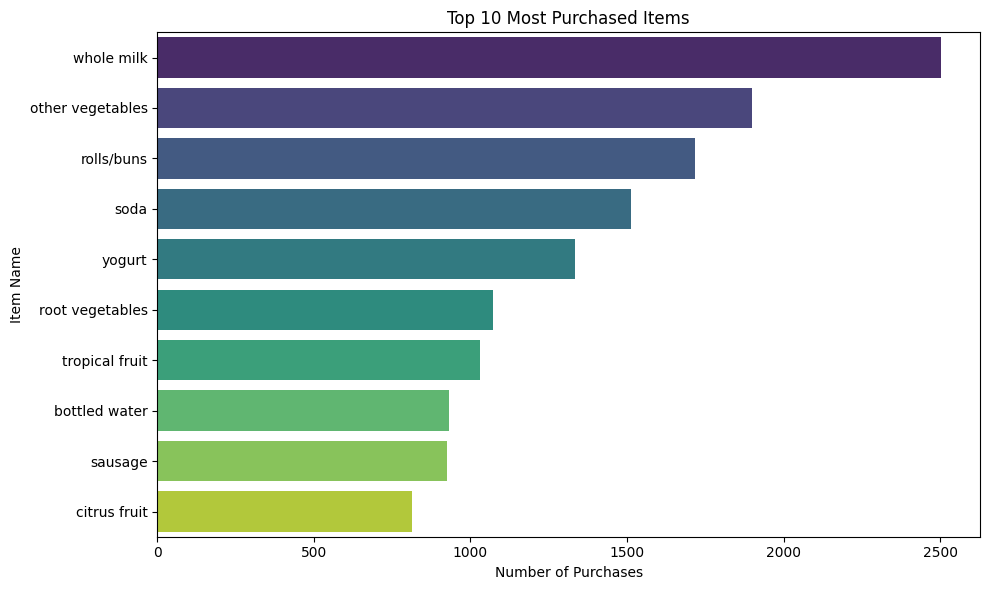

In [15]:
# Plot bar plot for most frequwnt items
plt.figure(figsize=(10,6))
sns.barplot(item_counts.head(10), x='Count', y='itemDescription', palette='viridis')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

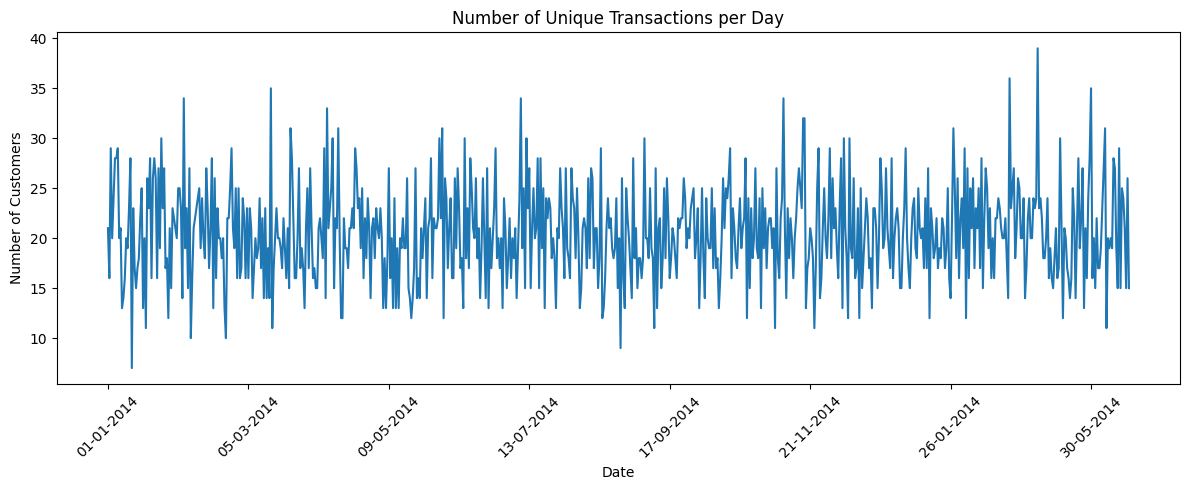

In [22]:
#  Number of Transactions per Day
daily_txn = df.groupby('Date')['Member_number'].nunique()

plt.figure(figsize=(12, 5))
daily_txn.plot()
plt.title("Number of Unique Transactions per Day")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-24-129ba4043aaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="mako")


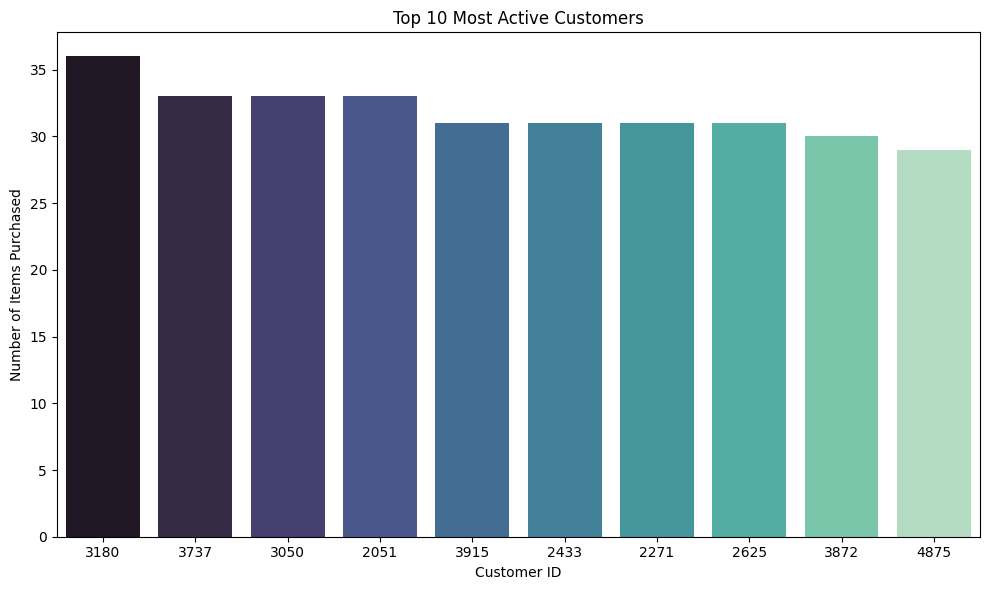

In [24]:
# Plot Top 10 Most Active Customers (by number of purchases)
top_customers = df['Member_number'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="mako")
plt.title("Top 10 Most Active Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Items Purchased")
plt.tight_layout()
plt.show()


#### At first we are creating association rules based on group_by member_number + date

In [93]:
#  Group by member_number + date
basket_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
basket_df.columns = ['member_number', 'Date', 'Items']


In [94]:
basket_df.head(5)

,member_number,Date,Items
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [95]:
basket_df.shape

(14963, 3)

In [96]:
basket_df.columns

Index(['member_number', 'Date', 'Items'], dtype='object')

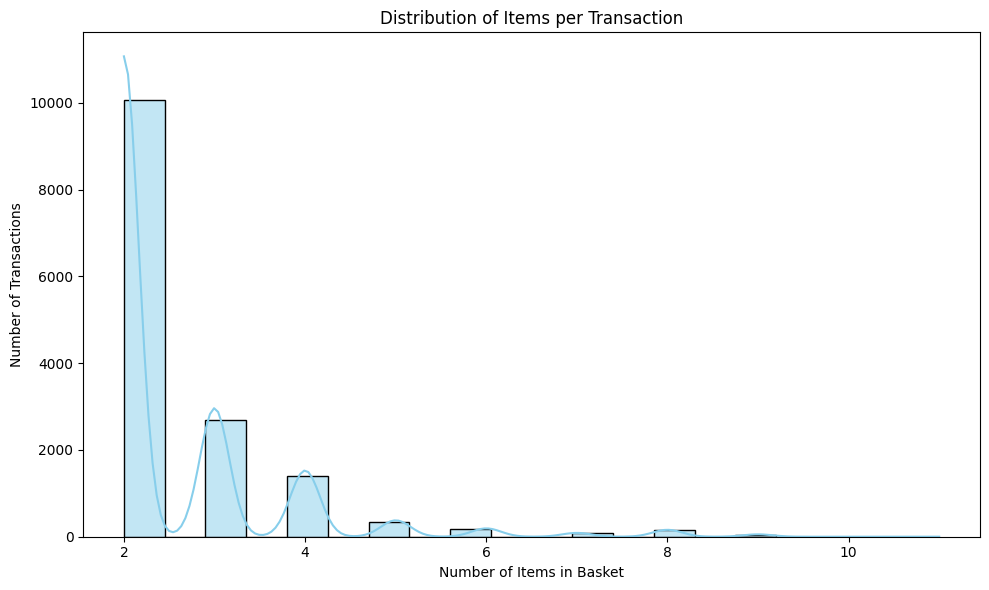

In [97]:
# Plot Items Purchased per Transaction
basket_df['item_count'] = basket_df['Items'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(basket_df['item_count'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Items per Transaction")
plt.xlabel("Number of Items in Basket")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

In [98]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Convert 'Items' column into list of transactions
transactions = basket_df['Items'].tolist()

# Step 2: Initialize and transform
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Step 3: Convert to DataFrame and change boolean to int
df_encoded = pd.DataFrame(te_array, columns=te.columns_).astype(int)

# Step 4: Display the DataFrame (first 10 rows, fully rendered)
df_encoded.head(10)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
#  Running Apriori to find frequent itemsets
# Import the apriori function from mlxtend.frequent_patterns
from mlxtend.frequent_patterns import apriori

# Run the apriori algorithm on the one-hot encoded DataFrame (df_encoded)
# min_support=0.01 means we consider itemsets that appear in at least 1% of all transactions
# use_colnames=True ensures the output uses the actual item names instead of column indices
frequent_itemsets = apriori(df_encoded.astype('bool'), min_support=0.01, use_colnames=True,max_len=3).sort_values(by='support')

# Print the first 5 frequent itemsets found
frequent_itemsets.head()


,support,itemsets
53,0.010025,(soft cheese)
44,0.010158,(processed cheese)
45,0.010493,(red/blush wine)
29,0.010559,(herbs)
64,0.010559,"(rolls/buns, other vegetables)"


In [100]:
# Import association_rules function from mlxtend.frequent_patterns
from mlxtend.frequent_patterns import association_rules

# Generate association rules from the frequent itemsets obtained earlier
# metric="lift" means the rules are evaluated based on lift value
# min_threshold=1 filters rules to only include those with lift >= 0.7 (lift > 0.7 means positive association)
rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

# Print selected columns from the rules DataFrame to see the key information of the top rules
# Columns:
# - antecedents: the item(s) on the left side of the rule (if these items are bought)
# - consequents: the item(s) on the right side of the rule (then these items are likely bought)
# - support: how frequently the whole rule appears in transactions
# - confidence: how often the rule has been found to be true
# - lift: how much more often the antecedent and consequent occur together than expected if they were independent
rules_df = rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_df.head()


,antecedents,consequents,support,confidence,lift
0,(rolls/buns),(other vegetables),0.010559,0.095990,0.786154
1,(other vegetables),(rolls/buns),0.010559,0.086481,0.786154
2,(yogurt),(whole milk),0.011161,0.129961,0.822940
3,(whole milk),(yogurt),0.011161,0.070673,0.822940
4,(soda),(whole milk),0.011629,0.119752,0.758296


In [101]:
# Filter the association rules to keep only the strong ones based on confidence and lift thresholds

# 'confidence >= 0.1' means we want rules where the consequent is found at least 10% of the time when antecedent occurs
# 'lift > 0.7' means the antecedent and consequent appear together more often than expected by chance (positive correlation)
strong_rules = rules_df[(rules_df['confidence'] >= 0.1) & (rules_df['lift'] > 0.7)]

# Print the filtered strong rules
strong_rules.head()

,antecedents,consequents,support,confidence,lift
2,(yogurt),(whole milk),0.011161,0.129961,0.822940
4,(soda),(whole milk),0.011629,0.119752,0.758296
6,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
8,(other vegetables),(whole milk),0.014837,0.121511,0.769430


In [102]:
strong_rules.shape

(4, 5)

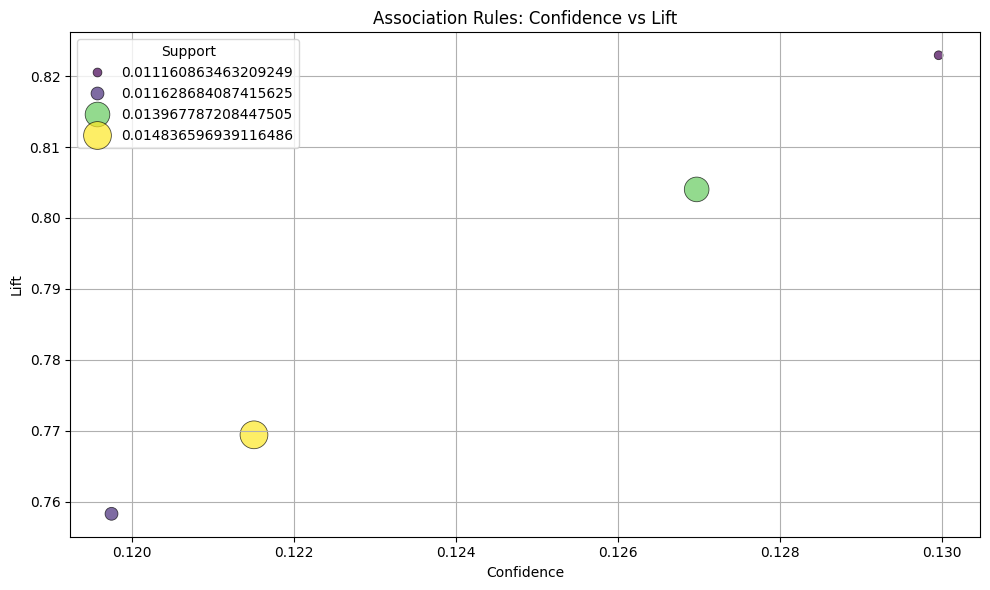

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=strong_rules,
    x='confidence',
    y='lift',
    size='support',
    hue='support',
    palette='viridis',
    sizes=(40, 400),
    alpha=0.7,
    edgecolor='k'
)

plt.title('Association Rules: Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.legend(title='Support', loc='best')
plt.tight_layout()
plt.show()

#### We are creating association rules based on group_by member_number + itemDescription

In [104]:
# convert data in format which is required
baskets = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [105]:
baskets['whole milk'].sum()

np.float64(2502.0)

In [106]:
# Encoding the items that sold more than 1
# So if user has taken that item mark as 1 else mark as 0.
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

# convert to binary
baskets_final = baskets.iloc[:, 1:baskets.shape[1]].map(one_hot_encoder)
baskets_final.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
# Finding the most frequent items sold together
# call apriori function and pass minimum support here we are passing 2,5%.
# means 2,5 times in total number of transaction the item should be present
frequent_itemsets = apriori(baskets_final.astype('bool'), min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)

,support,itemsets
540,0.025141,"(yogurt, rolls/buns, shopping bags)"
467,0.025141,"(citrus fruit, tropical fruit, whole milk)"
69,0.025141,(spread cheese)
524,0.025141,"(root vegetables, whole milk, pastry)"
85,0.025141,"(pip fruit, beef)"
480,0.025141,"(yogurt, frankfurter, whole milk)"
412,0.025141,"(specialty bar, whole milk)"
405,0.025141,"(whole milk, sliced cheese)"
119,0.025141,"(chocolate, bottled water)"
239,0.025141,"(root vegetables, dessert)"


In [108]:
frequent_itemsets.shape

(567, 2)

In [109]:
# Creating association rules for indicating astecedent and consequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

,antecedents,consequents,support,confidence,lift
879,(sausage),"(yogurt, rolls/buns)",0.035659,0.173101,1.554717
874,"(yogurt, rolls/buns)",(sausage),0.035659,0.320276,1.554717
452,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
457,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
876,"(rolls/buns, sausage)",(yogurt),0.035659,0.433022,1.530298
877,(yogurt),"(rolls/buns, sausage)",0.035659,0.126020,1.530298
941,"(yogurt, other vegetables)",(sausage),0.037199,0.309168,1.500795
944,(sausage),"(yogurt, other vegetables)",0.037199,0.180573,1.500795
635,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518
630,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518


<ipython-input-110-0ddb8d7f5b85>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


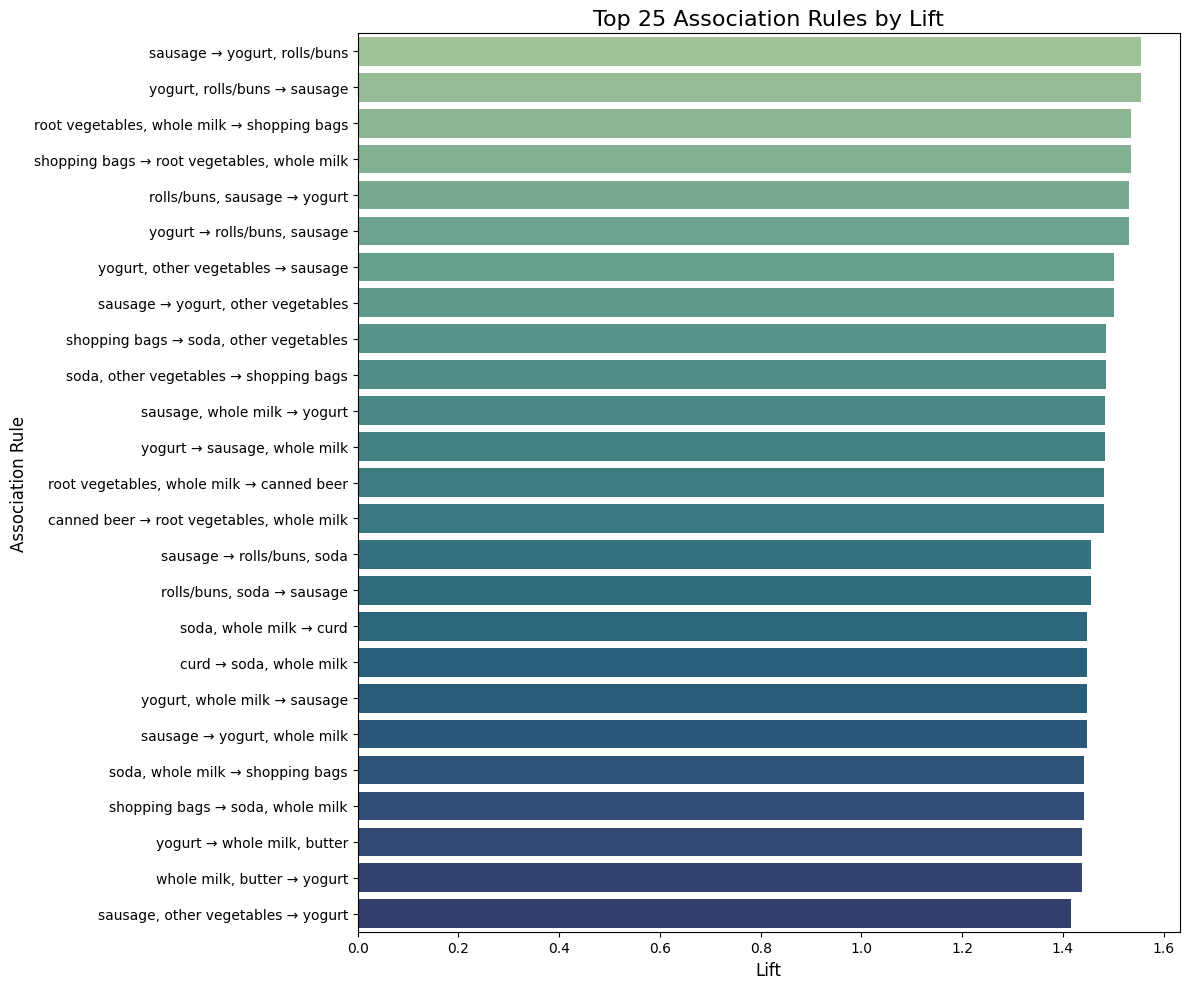

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create readable rule strings
rules['Rule'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + \
                rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Get top 25 rules
top25_rules = rules.head(25)

# Set plot size for better readability
plt.figure(figsize=(12, 10))
sns.barplot(
    data=top25_rules,
    x='lift',
    y='Rule',
    palette='crest'
)

plt.title('Top 25 Association Rules by Lift', fontsize=16)
plt.xlabel('Lift', fontsize=12)
plt.ylabel('Association Rule', fontsize=12)
plt.tight_layout()
plt.show()
